# Pymaceuticals Inc.
---

### Analysis

- The first inference we can make is that Capomulin does much better at keeping tumor sizes down than all drugs except for Ramicane. The mean tumor size of Capomulin is 40.67 and every other drug besides Ramicane is more than 52 for the average size. If we factor in that the tumor size started at 45 for all drugs, Capomulin was one of the only 2 drugs to actually reduce the mean tumor size across all mice. The next observation is that Capomulin has the most mice that made it to the 45th day of the trial. Capomulin had 230 mice make it to the end of the trial with Ramicane being the 2nd highest at 228. After Ramican the next highest was Ketapril at 188 mice. We can infer that Capomulin does a better job than the other drugs at keeping the tumor manageable and not allowing it to grow. The final inference we can make is that Weight is correlated to size of the tumor. There is strong positive correlation between weight and average size of tumor with the Pearson's correlation score being .84. With this we can now base future studies around weight and how it factor’s into tumor size.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mice_df = pd.merge(study_results, mouse_metadata, on= 'Mouse ID')

# Display the data table for preview
mice_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_df['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate = mice_df.loc[mice_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate

array(['g989'], dtype=object)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = mice_df[mice_df['Mouse ID'].isin(duplicate)==False]

In [5]:
# Checking the number of mice in the clean DataFrame.
cleaned_df.nunique()

Mouse ID               248
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen and put in a Dataframe
summary_stats = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
    ('Mean Tumor Volume', 'mean'),
    ('Median Tumor Volume', 'median'),
    ('Variance of Tumor Volume', 'var'),
    ('Standard Deviation', 'std'),
    ('Sem of Tumor Volume', 'sem'),
])
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation,Sem of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

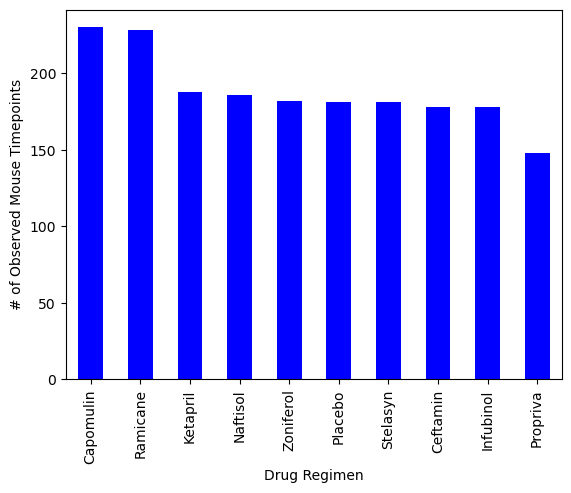

In [7]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints = cleaned_df.groupby('Drug Regimen').size().sort_values(ascending=False)
bar_graph = timepoints.plot(kind='bar', color='blue', align='center')
bar_graph.set_ylabel("# of Observed Mouse Timepoints")

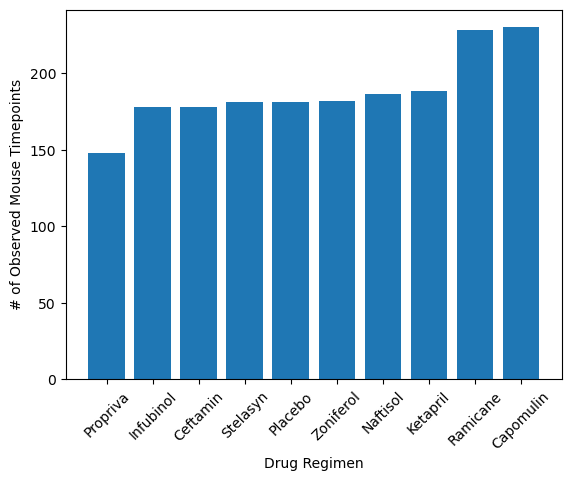

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = cleaned_df['Drug Regimen'].unique()
y_axis = cleaned_df['Drug Regimen'].value_counts()
y_axis_sorted = y_axis.sort_values()
x_axis_sorted = y_axis_sorted.index
plt.bar(x_axis_sorted, y_axis_sorted)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()


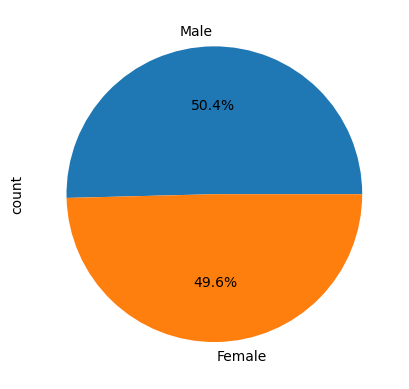

In [9]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
sex = cleaned_df.loc[:, ['Mouse ID', 'Sex']].drop_duplicates()
sex_counts = sex.Sex.value_counts()
# Make the pie chart

sex_counts.plot(kind='pie', autopct="%1.1f%%")
plt.show()


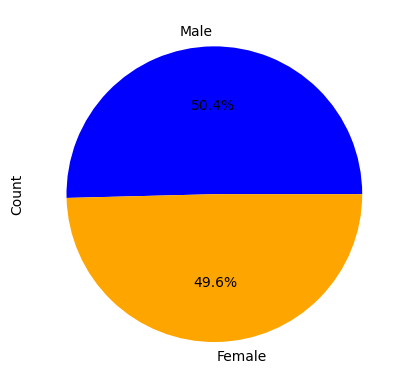

In [17]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
labels = ['Male', 'Female']
Gender = sex.Sex.value_counts()
colors = ['blue', 'orange']
explode = [0,0]
plt.pie(Gender, explode=explode, labels = labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=0)
plt.ylabel("Count")
plt.show()


## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_df = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_df = pd.merge(cleaned_df, timepoint_df, on=['Mouse ID', 'Timepoint'])
tumor_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [12]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_groups = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatment_groups:
    treatment_data = tumor_df.loc[tumor_df['Drug Regimen'] == treatment, "Tumor Volume (mm3)"]
    tumor_volumes.append(treatment_data)

     # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Quartiles = treatment_data.quantile([.25, .5, .75])
    Q1 = Quartiles[0.25]
    Q3 = Quartiles[0.75]
    
    # Calculate the IQR
    IQR = Q3 - Q1
    # Determine the upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify potential outliers
    outlier_values = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
# Print the outliers for each treatment group
    print(f"{treatment} potential outliers: {outlier_values}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


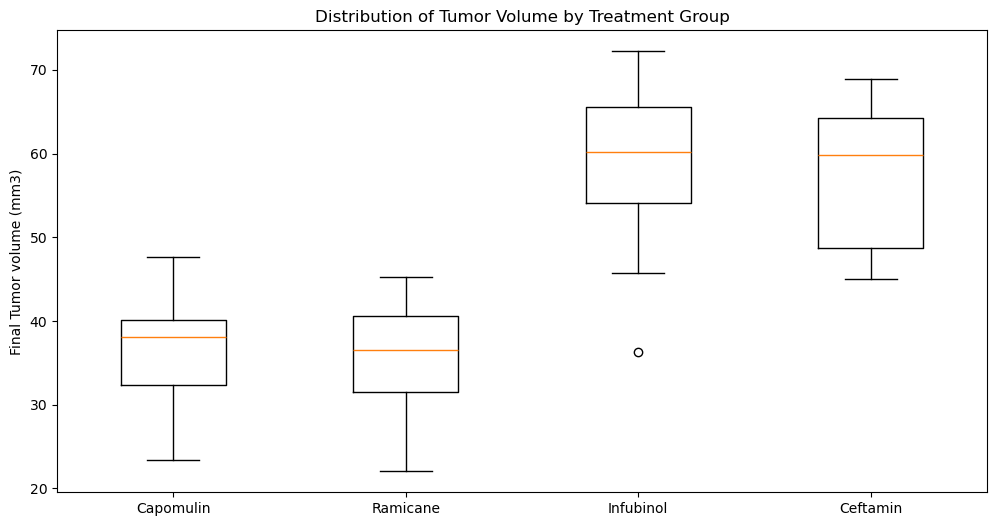

In [13]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(12, 6))
plt.boxplot(tumor_volumes, labels=treatment_groups)
plt.title('Distribution of Tumor Volume by Treatment Group')
plt.ylabel('Final Tumor volume (mm3)')
plt.grid(False)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

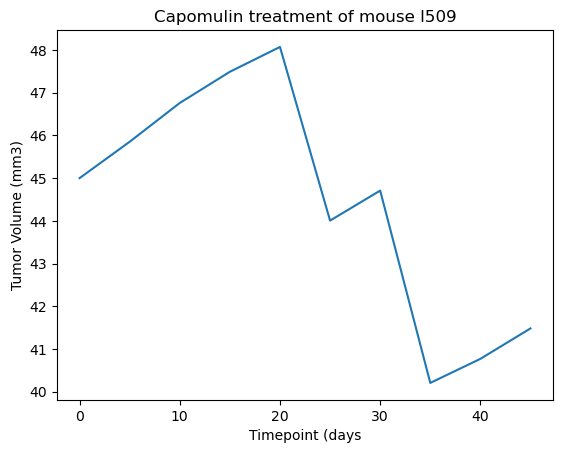

In [14]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_line = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']
mouse_data = Capomulin_line.loc[Capomulin_line['Mouse ID'] == 'l509']
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days')
plt.ylabel('Tumor Volume (mm3)')

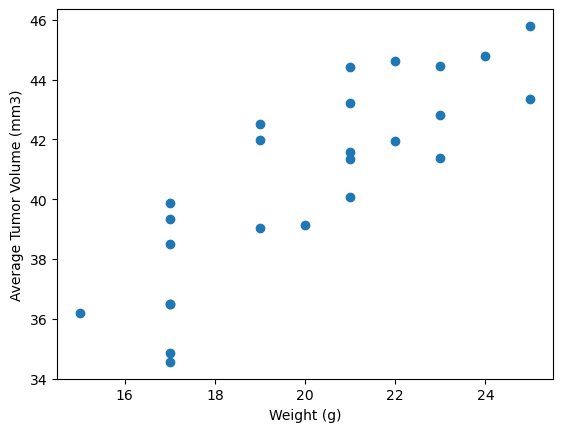

In [15]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_scatter = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']
capomulin_average = Capomulin_scatter.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

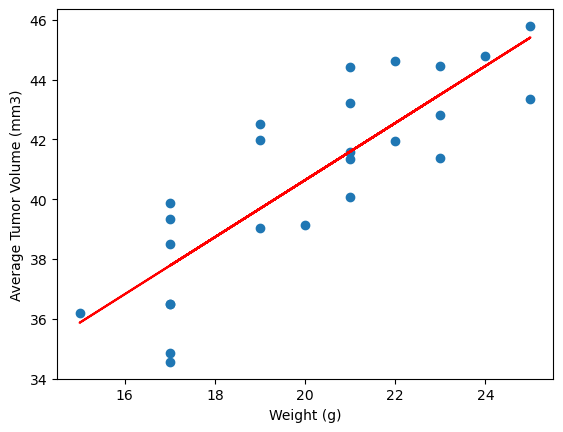

The pearson's correlation between weight and average tumor volume is 0.84


In [16]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr = round(st.pearsonr(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])[0], 2)
model = st.linregress(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])

y_values = capomulin_average['Weight (g)']* model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'], y_values, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
print(f"The pearson's correlation between weight and average tumor volume is {corr}")